# Implementing the GNN 
*without PyTorch Geometric

In [1]:
import wntr
import pandas as pd
import numpy as np
import pickle
import networkx as nx

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

(<matplotlib.collections.PathCollection at 0x1fb91bd9f10>,
 <matplotlib.collections.LineCollection at 0x1fb91bd45b0>)

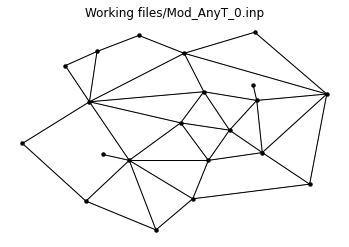

In [33]:
# Create a water network model
inp_file = 'Working files/Mod_AnyT_0.inp'
wn_current_WDS = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn_current_WDS, title=wn_current_WDS.name)


In [69]:
database = pickle.load( open( "Mod_AnyT_DB_trial.p", "rb" ) )

In [99]:
diams = dict(zip(wn_current_WDS.link_name_list, list(database.loc[0]['Diams']))) #diam

In [100]:
G_WDS = wn_current_WDS.get_graph(link_weight=diams) # directed multigraph

In [101]:
A_WDS = nx.adjacency_matrix(G_WDS)

In [102]:
print(A_WDS.todense())

[[ 0.  8.  0.  0.  0.  0.  6.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0. 14.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  8.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 14.  0.]
 [ 0. 14.  0.  0.  0.  6.  0.  0.  0. 14. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 12.  0.  0.  8.  0. 14.  0.  0.  0.  0.  0. 14.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0. 10. 12.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [136]:
class GNN(nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        
        self.h0 = nn.Parameter(torch.tensor(0.4))
        self.h1 = nn.Parameter(torch.tensor(0.2))
        self.h2 = nn.Parameter(torch.tensor(0.1))
        
    #def graph_filter(self, S, x, ):
        
    def forward(self, S, x):
        
        ans = self.h0 * torch.matmul(torch.pow(S, 0), x)
        ans += self.h1 * torch.matmul(torch.pow(S, 1), x)
        ans += self.h2 * torch.matmul(torch.pow(S, 2), x)
        
        #ans = torch.sigmoid(ans)
        ans = torch.relu(ans)
        
        return ans

In [137]:
trial = GNN()

In [138]:
S = torch.tensor(np.array(A_WDS.todense()), dtype = torch.float32)
x = torch.rand(21)

In [139]:
S.dtype

torch.float32

In [140]:
trial(S, x)

tensor([13.8718, 25.5148,  9.7839, 19.3624, 11.1956, 19.9253, 57.9963,  5.0799,
         5.8725, 55.6798, 30.7323, 25.5258, 11.1956, 22.1483, 33.2742, 36.1943,
        17.5267,  6.1895,  6.5594,  5.0799, 17.3957], grad_fn=<ReluBackward0>)

In [116]:
for i in trial.parameters():
    print(i)

Parameter containing:
tensor(0.1000, requires_grad=True)
Parameter containing:
tensor(0.5000, requires_grad=True)
Parameter containing:
tensor(0.3000, requires_grad=True)
